# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [43]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge (study_results, mouse_metadata, how = 'outer', on = 'Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Check the number of rows and columns in merged dataset
data_df.shape

(1893, 8)

In [ ]:
# Checking the number of mice.
mice_count = len(data_df['Mouse ID'].unique())
mice_count

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = data_df[data_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID']
duplicate_mice_id.unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_data = data_df.loc[data_df['Mouse ID'] == 'g989',:]
duplicate_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = data_df.loc[data_df['Mouse ID'] != 'g989',:]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Check the number of rows and columns in cleaned dataset
# Compare this with number of rows in merged dataset to confirm that duplicate mouse ID has been removed
cleaned_df.shape

(1880, 8)

In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count_cleaned = len(cleaned_df['Mouse ID'].unique())
mice_count_cleaned

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# # mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_data = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
tumor_volume_mean = tumor_data.mean(['Tumor Volume (mm3)'])
tumor_volume_median = tumor_data.median(['Tumor Volume (mm3)'])
tumor_volume_variance = tumor_data.var(ddof=1)
tumor_volume_stdev = tumor_data.std(ddof=1)
tumor_volume_sem = tumor_data.sem(ddof=1)

# # Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({"Mean Tumor Volume" : tumor_volume_mean,
                              "Median Tumor Volume" : tumor_volume_median,
                              "Tumor Volume Variance" : tumor_volume_variance,
                              "Tumor Volume Std. Dev." : tumor_volume_stdev,
                              "Tumor Volume Std. Err." : tumor_volume_sem})
tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_data_summary = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_data_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

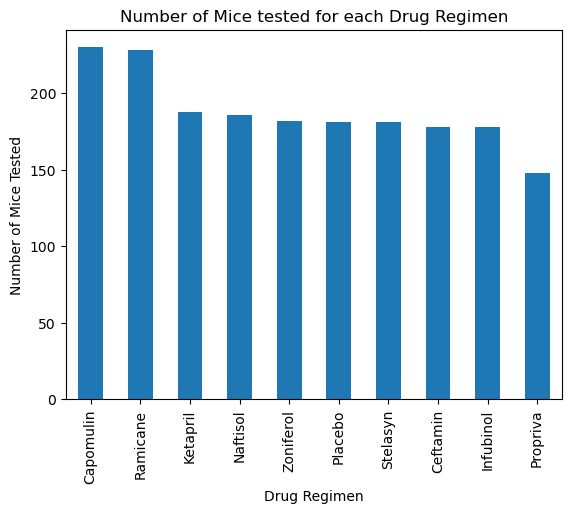

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the dataframe only to the columns needed for the chart
drug_specimen_data = cleaned_df.groupby(['Drug Regimen'])
timepoint_data = drug_specimen_data['Timepoint'].count().sort_values(ascending=False)

# Use the filtered dataframe to create a bar chart and add title and labels
figure1 = timepoint_data.plot(kind="bar",
                              title="Number of Mice tested for each Drug Regimen",
                              xlabel="Drug Regimen",
                              ylabel="Number of Mice Tested")

# Configure x-ticks
xticklabels = timepoint_data.index
figure1.set_xticklabels(xticklabels, rotation=90)

# Show the chart
plt.tight_layout
plt.show()


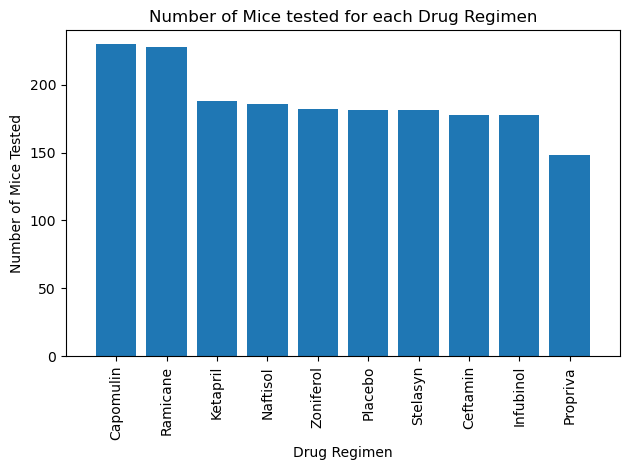

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations based on filtered data from previous chart
x_axis = np.arange(len(timepoint_data))

# Create a bar chart based on the above data
figure2 = plt.bar(x_axis, timepoint_data.sort_values(ascending=False), align="center")

# Set the tick locations and create ticks for bar chart's x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoint_data.index, rotation="vertical")

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(timepoint_data)+10)

# Add title and labels to the chart
plt.title("Number of Mice tested for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Show the chart
plt.tight_layout()
plt.show()

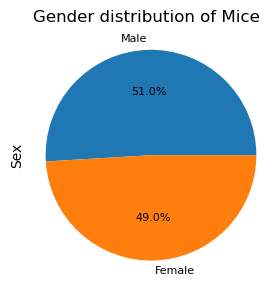

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Filter the dataframe only to the data needed for the chart
gender = cleaned_df['Sex'].value_counts()

# Use the filtered data to create a pie chart and add title
figure3 = gender.plot(kind="pie", y='Sex', autopct="%1.1f%%", figsize=(3,3), subplots=True, 
                      legend=False, fontsize=8, title="Gender distribution of Mice")

# Show th echart
plt.axis("equal")
plt.show()

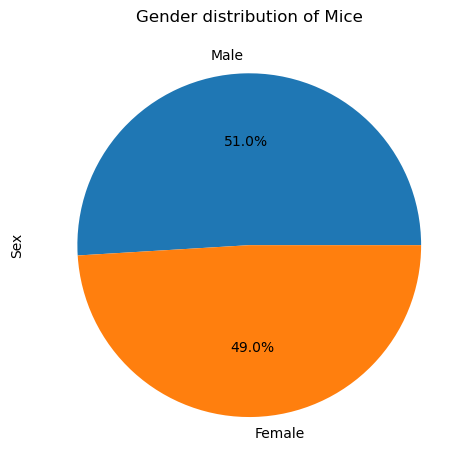

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create the chart using filtered data from previous chart
explode=(0,0)
figure4 = plt.pie(gender, labels=gender.index.values, explode=explode, 
        autopct="%1.1f%%", shadow=False, startangle=0)

# Add title and labels to the chart
plt.title("Gender distribution of Mice")
plt.ylabel("Sex")

# Show the chart
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_df = cleaned_df.groupby(cleaned_df['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments_df = pd.merge(cleaned_df, group_df, on=('Mouse ID', 'Timepoint'), how='right')
treatments_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_df=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
    # Note: (Subset of maxmim Tumor Volumes was already created by merging dataset on 'right')

for drug in treatments:
    drug_data = treatments_df.loc[treatments_df["Drug Regimen"] == drug]
    drug_df.append(drug_data["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_data['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = round(lowerq - (1.5*iqr), 5)
    upper_bound = round(upperq + (1.5*iqr), 5)

    outliers = drug_data.loc[(drug_data["Tumor Volume (mm3)"] >= upper_bound) | (drug_data["Tumor Volume (mm3)"] <= lower_bound)]
    outliers_values = outliers['Tumor Volume (mm3)']

    print(f"{drug} has lower boundary of {lower_bound} and upper boundary of {upper_bound}.")
    print(f"{drug}'s potential outliers: {outliers_values}")
    print(f"_______________________________________________________________________________")
    

Capomulin has lower boundary of 20.70456 and upper boundary of 51.83202.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
_______________________________________________________________________________
Ramicane has lower boundary of 17.91266 and upper boundary of 54.30681.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
_______________________________________________________________________________
Infubinol has lower boundary of 36.8329 and upper boundary of 82.74145.
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
_______________________________________________________________________________
Ceftamin has lower boundary of 25.35545 and upper boundary of 87.66646.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
_______________________________________________________________________________


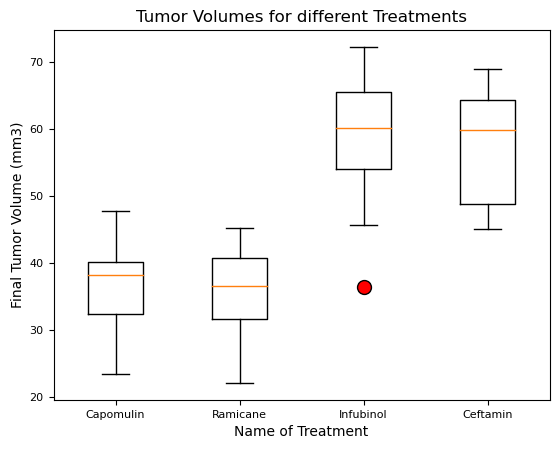

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Specify display details for the outliers
marker_details = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')

# Create chart and add title and labels
figure5, ax1 = plt.subplots()
ax1.boxplot(drug_df, flierprops=marker_details)

plt.title("Tumor Volumes for different Treatments")
plt.xlabel('Name of Treatment')
plt.ylabel("Final Tumor Volume (mm3)")
plt.rcParams["figure.figsize"]=(5,4)
plt.rcParams["font.size"]=8
plt.tick_params(labelsize=8)
plt.xticks([1, 2, 3, 4], treatments)

plt.show()


## Line and Scatter Plots

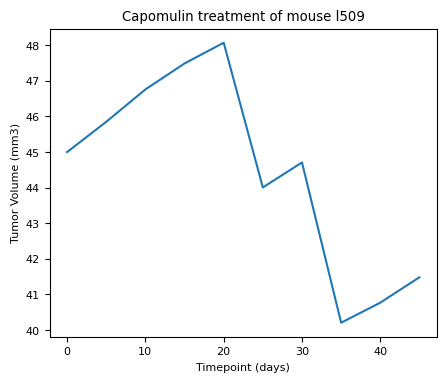

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Get the data for Timepoint and Tumor Volume for mouse l509
line_data = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509"]
timepoint = line_data["Timepoint"]
tumor_volume = line_data["Tumor Volume (mm3)"]

# Plot the data
figure6 = plt.plot(timepoint, tumor_volume)

# Add chart title and labels
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the chart
plt.show()


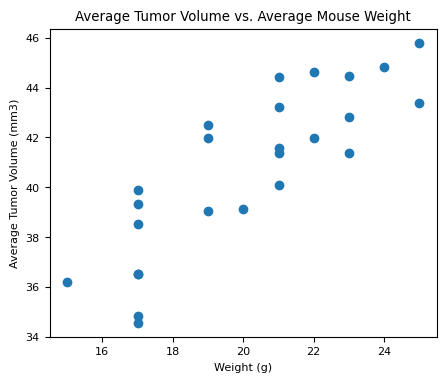

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Get the data for Average Tumor Volume and Mouse Weight for Capomulin and group by Mouse ID
scatter_data = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
scatter_average_data = scatter_data.groupby(scatter_data["Mouse ID"]).mean()
avg_tumor_volume = scatter_average_data["Tumor Volume (mm3)"]
mouse_weight = scatter_average_data["Weight (g)"]

# Plot the data
figure7 = plt.scatter(mouse_weight, avg_tumor_volume)

# Add chart title and labels
plt.title("Average Tumor Volume vs. Average Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the chart
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


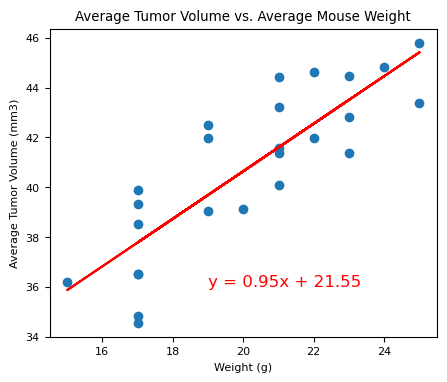

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Add the linear regression equation and line to the scatter plot
# Re-name data arrays to x_values and y_values for easy reference
x_values = mouse_weight
y_values = avg_tumor_volume

# Calculate the values for linear regression model and draft the linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Chart the data into scatter plot
figure8 = plt.scatter(x_values,y_values)

# Draw the slope and insert the linear equation
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=12,color="red")

# Add chart title and labels
plt.title("Average Tumor Volume vs. Average Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the chart
plt.show()